# Introduction to Data Science - Homework 6
*CS 5963 / MATH 3900, University of Utah, http://datasciencecourse.net/*

Due: Friday, November 11, 11:59pm.

In this homework, you will (i) analyze US Crime data using clustering and principal component analysis and (ii) investigate the Karate Club dataset using network analysis. 

## Your Data
Fill out the following information: 

*First Name:*   Martin
*Last Name:*   Raming
*E-mail:*   raming.martin@gmail.com
*UID:*  u0228111

## Part 1: Analyze US Crime data

We'll analyze a dataset describing 1973 violent crime rates by US State. The crimes considered are assault, murder, and rape. Also included is the percent of the population living in urban areas.

The dataset is available as [USarrests.csv](USarrests.csv). The dataset has 50 observations (corresponding to each state) on 4 variables: 
1. Murder: Murder arrests (per 100,000 residents)
2. Assault: Assault arrests (per 100,000 residents)
3. UrbanPop: Percent urban population
4. Rape: Rape arrests (per 100,000 residents)


You can read more about the dataset [here](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/USArrests.html). 

Our goal will be to use PCA and clustering tools to understand how violent crimes differ between states. 


### Task 1.1 Import the data and perform some prelimary exploratory analysis. 
Use the *read_csv* function to import the data as a pandas dataframe. 

Plot a scatterplot matrix of the data. Explore basic statistics of the data. Write a few sentences describing how the variables are correlated. 

In [42]:
# imports and setup 

import pandas as pd
import numpy as np

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
import seaborn as sns
pd.set_option('display.notebook_repr_html', False)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

         Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000

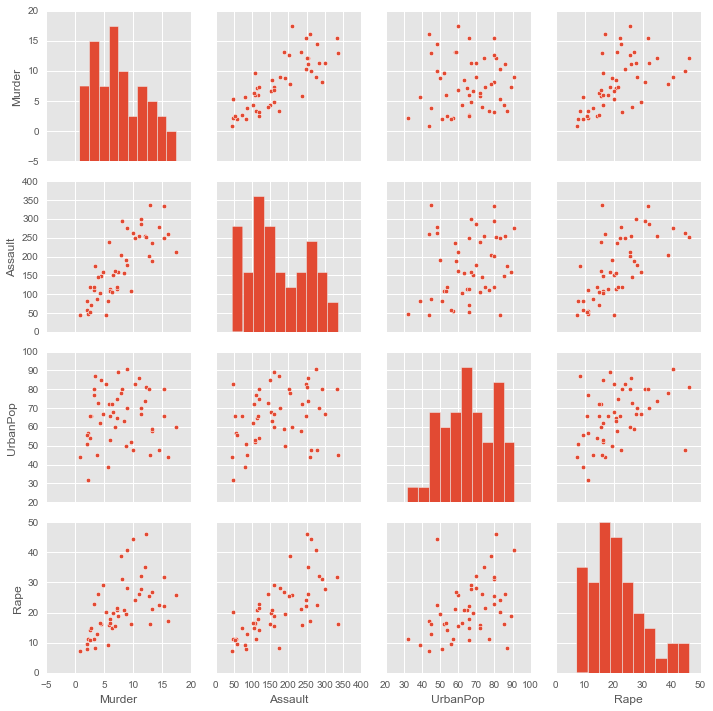

In [43]:
# Your code here

df = pd.read_csv("USarrests.csv")
sns.pairplot(df)
df.describe()

**Your description:** TODO 

** Solution: ** Of the violent crimes, murder and assult are most hightly correlated (coeff. = 80%) followed by assault and rape (coeff. = 66%) and murder and rape (coeff. = 56%). Of the violent crimes, rape correlates most strongly with urban population. 

### Task 1.2 Principal Component Analysis (PCA) 

In this task, you'll perform a principal component analysis of the dataset. A principal component analysis of this dataset using R is performed in Chapter 10 of An Introduction to Statistical Learning by Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani. A digital copy of this book is available [here](http://www-bcf.usc.edu/~gareth/ISL/). In this exercise, you'll largely repeat the analysis in this chapter, of course using python. You're strongly encouraged to read this chapter for a better understanding and interpretation of the method. 

1. Scale the dataset using the *scale* function of the sklearn.preprocessing library. 
+ Calculate the principal components of the dataset. 
+  Store the principal components in a new dataframe that looks like this: 
![](pcas.png)
+ Plot a scatterplot of PC1 and PC2. Use the state names as markers (instead of dots). Hint: use the matplotlib function *annotate*. 
+ Print the explained variance ratio of the PCA. Plot the explained variace ratio of the PCA. Interpret these values. Is it reasonable to reduce the four dimensional space to two dimensions using PCA? 

In [44]:

df.head()

df.rename(columns={"Unnamed: 0":"States"},inplace = True)
idx =df.columns
print(idx)

Index(['States', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')


In [79]:
# scale the dataset

df_scaled = scale(df.drop("States",axis =1))
# find PCA and transform to new coordinates
pca_model = PCA()
PCA_array = pca_model.fit_transform(df_scaled)
PC1=[]
PC2=[]
PC3=[]
PC4 =[]
for rows in PCA_array:
    PC1.append(rows[0])
    PC2.append(rows[1])
    PC3.append(rows[2])
    PC4.append(rows[3])
# create a new pandas dataframe 
PCA_df=pd.DataFrame()

PCA_df["States"]=df["States"]
PCA_df["PC1"]=PC1
PCA_df["PC2"]=PC2
PCA_df["PC3"]=PC3
PCA_df["PC4"]=PC4
PCA_df.head()

       States       PC1       PC2       PC3       PC4
0     Alabama -0.985566  1.133392 -0.444269  0.156267
1      Alaska -1.950138  1.073213  2.040003 -0.438583
2     Arizona -1.763164 -0.745957  0.054781 -0.834653
3    Arkansas  0.141420  1.119797  0.114574 -0.182811
4  California -2.523980 -1.542934  0.598557 -0.341996

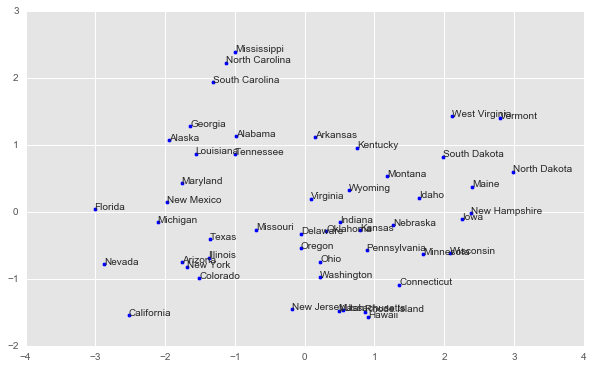

In [141]:

#plt.scatter(PCA_df["PC1"],PCA_df["PC2"])
i=0;
for name in PCA_df["States"]:
    
    plt.scatter(PCA_df.at[i,"PC1"],PCA_df.at[i,"PC2"])
    plt.annotate(s=name,xy=(PCA_df.at[i,"PC1"],PCA_df.at[i,"PC2"]))
    i=i+1
# Plot Principal Components 1 and 2


In [142]:
# Plot variance ratio of the four principal components

pca_model.explained_variance_ratio_

array([ 0.62006039,  0.24744129,  0.0891408 ,  0.04335752])

**Your interpretation:** TODO 

### Task 1.3 K-Means Cluster Analysis
1. Using k-means, cluster the states into four clusters. Which states belong to which clusters?
+ Vary k and find the *best* value. How do you determine *best*? 
+ Using the *best* value of k from part (2), use the principal components to plot the clusters. Again label each point using the state name and this time color the states according to cluster.

In [ ]:
# Run k-means

In [ ]:
# plot inertia

**Your Interpretation:** TODO

In [ ]:
# Plot Principal Components 1 and 2, colored by cluster

### Task 1.4 Hierarchical cluster analysis

1.  Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states into four clusters. Which states belong to which clusters? 
+ Make a plot as in Task 1.3. 
+ Compare the results of K-Means to Hierarchical clustering. Are they similar?

In [ ]:
# Your cluster code here

In [ ]:
# Plot clusters using PCAs

**Your Interpretation:** TODO

## Part 2: Network analysis


### Task 2.1 Load the data and explore

We'll use one of the datasets that is built into networkx, the [Karate Club dataset](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.generators.social.karate_club_graph.html#networkx.generators.social.karate_club_graph).

Load the dataset, print some basic statistics and visualize the nodes, links, and labels with a force directed layout.



In [ ]:
# imports and setup 
import networkx as nx

In [ ]:
# import karate club, plot info

In [ ]:
# plot graph

### Task 2.2: Calculate Connectedness Measures

Calculate the node degrees,and betweennes centrality. Plot a node-link diagram with nodes scaled proportionally to these measures for each. Plot histograms of the distributions. 

Which are the most important nodes? 

In [ ]:
# calculate and print degrees

In [ ]:
# plot networks scaled by degree

In [ ]:
# calculate centrality

In [ ]:
# plot network scaled by centrality

In [ ]:
# plot histograms

### Task 2.3: Removed Network Nodes

Remove the two most central nodes from the network. Plot the network. How many connected components remain? How big are these components [read the documentation to learn how to do that]? What does this tell us about this network, is it tightly connected or very centralized?

In [ ]:
# remove nodes

In [ ]:
# plot network

In [ ]:
# how many components?

In [ ]:
# how big are components?

**Your Interpretation:** TODO

### Task 2.4: Pathfinding

Print the shortest path from node 18 to 24.

In [ ]:
# path finding